In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 90% de los datos para entrenamiento y un 10% de los datos para validación
valid_idx  =  range ( len ( df ) - 29 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['SCL90_PSICOT', 'CSI_RETISOC', 'CAPE_DEPRE_MALESTAR', 'ESTRES_PERCIBIDO', 'CSI_REESTCOGN', 'CAPE_NEG_MALESTAR', 'CSL90_HOSTIL', 'SCL90_DEPRE', 'TRAUMA_AFECTACION', 'CSI_APOYOSOC', 'ANSIEDADRASGO', 'CSI_PENSDESID', 'SCL90_IDEA_PARAN', 'SCL90_SOMAT', 'CAPE_POSIT_FREC', 'SCL90_ANSIE', 'CSI_AUTOCRIT', 'CSL90_SENS_INT', 'CAPE_DEPRE_FREC', 'SCL90_ANS_FOB', 'CAPE_POS_MALESTAR', 'SCL90_OBS_COMP', 'CAPE_NEG_FREC', 'CSI_EVITPROBL', 'TRAUMA_FRECUENCIA', 'CSI_RESPROBL', 'CSI_EXPEMOC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 1.162377 -0.198572 -1.355078 -0.228165 ...  0.76507  -1.310505 -1.89156   0.36024 ]
 [ 1.83308  -0.411209 -1.355078 -0.108981 ... -0.113692 -1.310505 -0.891702 -0.596182]
 [ 2.235501 -0.198572  1.657746  1.082856 ... -1.212144 -0.648816 -0.891702 -0.404898]
 [ 0.625815  0.43934  -0.533399  0.844489 ...  0.325689  0.012873  0.908042  1.507946]
 [ 1.698939  1.927803  0.28828   0.963673 ...  2.083213  1.147197 -0.69173  -0.978751]]
[0 0 0 1 1]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.969444,0.928581,0.724138,02:45
1,0.835994,0.809438,0.724138,02:30
2,0.753811,0.755727,0.758621,02:32
3,0.694582,0.716154,0.758621,02:44
4,0.636873,0.687218,0.758621,02:31


SCL90_PSICOT,CSI_RETISOC,CAPE_DEPRE_MALESTAR,ESTRES_PERCIBIDO,CSI_REESTCOGN,CAPE_NEG_MALESTAR,CSL90_HOSTIL,SCL90_DEPRE,TRAUMA_AFECTACION,CSI_APOYOSOC,ANSIEDADRASGO,CSI_PENSDESID,SCL90_IDEA_PARAN,SCL90_SOMAT,CAPE_POSIT_FREC,SCL90_ANSIE,CSI_AUTOCRIT,CSL90_SENS_INT,CAPE_DEPRE_FREC,SCL90_ANS_FOB,CAPE_POS_MALESTAR,SCL90_OBS_COMP,CAPE_NEG_FREC,CSI_EVITPROBL,TRAUMA_FRECUENCIA,CSI_RESPROBL,CSI_EXPEMOC,target,prediction
1.1624,0.2267,1.1100,-0.1090,-0.5802,0.8558,0.2362,0.1676,0.9432,-1.4423,0.0405,-0.7319,-0.1294,-0.0945,0.3136,0.2722,-0.3827,0.4778,0.5821,0.5898,1.0705,0.1826,0.6933,-0.7728,1.0527,-1.2916,-0.7875,2,1
-0.5814,-1.0491,1.1100,1.9171,-1.1338,2.0357,-0.1974,-0.6314,-0.1727,0.4289,-0.2659,-0.3960,-0.3251,-0.5763,-0.4674,-0.4465,-1.0878,-0.2051,0.3498,-0.6964,-0.0131,0.2888,0.6933,-1.4318,-0.4598,-2.0915,-0.5962,0,0
-0.8497,-0.1986,-0.3965,-0.5857,0.7116,0.5835,-0.8476,-0.9510,-0.3444,0.5990,0.1938,-1.9074,-0.7164,-0.6727,-0.4674,-0.5662,-0.9116,-0.7514,-0.3471,-0.6964,-0.2298,-0.7731,0.2923,-0.7728,-0.6488,1.3080,-0.7875,0,0
-0.4473,-0.4112,-0.6703,-0.1090,-0.7647,-1.0504,1.3199,1.1263,0.0419,-0.7619,-0.7256,-0.8998,-0.1294,1.0619,-0.6236,0.7513,-1.2641,0.8875,-0.3471,-0.1451,-0.7716,0.1826,-0.1087,-0.5531,1.0527,-0.8917,-0.4049,2,0
0.0893,-0.8365,0.6991,-0.1090,-0.2111,0.4019,-0.4141,-0.5515,-1.0740,-0.2515,-0.8788,-0.7319,-0.9120,-0.4800,-0.3112,-0.2069,-1.0878,-0.2051,0.3498,-0.1451,-0.1214,0.1826,-0.1087,0.3257,-1.1215,-1.6916,-0.9788,1,0


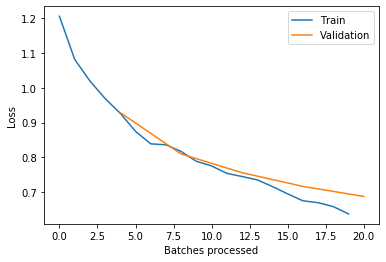

In [10]:
learn.recorder.plot_losses()
learn.show_results()

In [11]:
# el numero en el nombre es el porcentaje de precision, en este caso el porcentaje es 0.758621
learn.save("trained_model_758621", return_path=True)

WindowsPath('C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/models/trained_model_758621.pth')